Descripción de variables

# Autenticador Drive

In [1]:
# vincular colab con Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


#Librerias

In [2]:
# @title Instalar libreria
!pip install sweetviz
!pip install category_encoders
!pip install unidecode
!pip install rdt
!pip install lazypredict

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 56.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 34.0 MB/s eta 0:00:00


In [3]:
# importar librerias y modulos a utilizar
import os
import re
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import sweetviz as sw
import category_encoders as ce
from google.colab import files

#ML

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.decomposition import PCA
import xgboost as xgb


#Balanceo
from imblearn.under_sampling import CondensedNearestNeighbour, EditedNearestNeighbours, InstanceHardnessThreshold, RepeatedEditedNearestNeighbours, OneSidedSelection
from imblearn.under_sampling import TomekLinks
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.cluster import MiniBatchKMeans
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import NearMiss

#Algoritmos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Funciones

In [4]:
# @title Cargamos las funciones relacionadas
# Función para analizar la base de datos que devuelve cantidad de registros, valores únicos, total de vacíos, porcentaje de valores faltantes
def analizar_columnas(df):
  """
  Analiza las columnas de un DataFrame y devuelve información estadística.

  Parámetros:
  df (DataFrame): El DataFrame a analizar.

  Retorno:
  Un DataFrame con la información estadística de cada columna.

  Ejemplo:
  df_analizado = analizar_columnas(df)
  print(df_analizado)
  """
  info = []
  for columna in df.columns:
    unicos = df[columna].nunique()
    nulos = df[columna].isnull().sum()
    total = len(df)
    porcentaje_nulos = (nulos / total) * 100
    info.append({
      'Columna': columna,
      'Cantidad de registros': total,
      'Únicos': unicos,
      'Cantidad de nulos': nulos,
      'Porcentaje de nulos': porcentaje_nulos,
      'Registros relacionados con nulos': total - nulos
    })
  return pd.DataFrame(info)

# Ruta de datos

In [5]:
# ruta de la carpeta donde están guardadas las bases de datos
path="/content/drive/MyDrive/Proyecto IA bootcamp/Datos/"

# Base de datos

In [6]:
# cargamos cada una de las bases de datos
bbdd13 = pd.read_excel(path+"Mensual_2013_2017.xlsx")
bbdd18 = pd.read_excel(path+"Mensual_2018.xlsx")
bbdd19 = pd.read_excel(path+"Mensual_2019.xlsx")
bbdd20 = pd.read_excel(path+"Mensual_2020.xlsx")
bbdd21 = pd.read_excel(path+"Mensual_2021.xlsx")
#bbdd22 = pd.read_excel(path+"Mensual_2022.xlsx")
#bbdd23 = pd.read_excel(path+"Mensual_2023.xlsx")

In [7]:
bbdd_final = pd.concat([bbdd13, bbdd18, bbdd19, bbdd20, bbdd21]) #, bbdd22, bbdd23])
bbdd_final.info(8)

<class 'pandas.core.frame.DataFrame'>
Index: 505377 entries, 0 to 54527
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   MES           505377 non-null  object
 1   YEAR          505377 non-null  int64 
 2   GRUPO         505377 non-null  object
 3   PRODUCTO      505377 non-null  object
 4   CIUDAD        505377 non-null  object
 5   DEPARTAMENTO  144587 non-null  object
 6   PRECIO_KG     505377 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 30.8+ MB


In [8]:
bbdd_final.MES.unique()

array([5, 6, 7, 8, 10, 11, 2, 9, 12, 1, 4, 3, 'abr', 'ene', 'feb', 'mar',
       'may', 'jun', 'jul', 'dic', 'nov', 'ago', 'sep', 'oct'],
      dtype=object)

In [9]:
# Replace 'Ancuyá' with 'Ancuya' in the 'CIUDAD' column
bbdd_final['CIUDAD'] = bbdd_final['CIUDAD'].replace('Ancuyá', 'Ancuya')

In [10]:
bbdd_final['MES'][bbdd_final['MES'].apply(lambda x: isinstance(x, (int, float)))]
#bbdd_final.PRECIO_KG[bbdd_final.PRECIO_KG<100] = bbdd_final.PRECIO_KG[bbdd_final.PRECIO_KG<100]*100

,MES
0,5
1,6
2,7
3,8
4,10
...,...
54523,3
54524,12
54525,11
54526,2


In [11]:
# prompt: verificar y reemplazar en la variable de bbdd_final para la columna de MES que me queden en meses, ya que permite que dar en nombre del mes ya que tengo 1 en ves de enero y asi con los demas

# Create a dictionary to map month numbers to month names
month_mapping = {
    1: 'ene', 2: 'feb', 3: 'mar', 4: 'abr', 5: 'may', 6: 'jun',
    7: 'jul', 8: 'ago', 9: 'sep', 10: 'oct', 11: 'nov', 12: 'dic'
}

# Replace month numbers with month names in the 'MES' column
bbdd_final['MES'][bbdd_final['MES'].apply(lambda x: isinstance(x, (int, float)))] = bbdd_final['MES'][bbdd_final['MES'].apply(lambda x: isinstance(x, (int, float)))].map(month_mapping)

<ipython-input-11-568f95f6cf5d>:10: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  bbdd_final['MES'][bbdd_final['MES'].apply(lambda x: isinstance(x, (int, float)))] = bbdd_final['MES'][bbdd_final['MES'].apply(lambda x: isinstance(x, (int, flo

# Limpieza de datos

In [12]:
bbdd_final.CIUDAD.unique()

array(['Cali', 'Palmira', 'Medellín', 'Pasto', 'Bogotá', 'Popayán',
       'Buenaventura', 'Tuluá', 'Cartago', 'Florencia', 'Santa Marta',
       'Barranquilla', 'Cartagena', 'Sincelejo', 'Cúcuta', 'Pamplona',
       'Valledupar', 'Neiva', 'San Andrés de Tumaco', 'Armenia',
       'Villavicencio', 'Bucaramanga', 'Ibagué', 'Montería', 'Manizales',
       'Malambo', 'Arauca', 'Pereira', 'San Gil', 'Tunja', 'Socorro',
       'Ubaté', 'La Dorada', 'Sogamoso', 'Chiquinquirá', 'Yopal',
       'Ipiales', 'Peñol', 'El Carmen de Viboral', 'San Vicente',
       'Marinilla', 'Sonsón', 'Duitama', 'La Unión', 'Rionegro',
       'La Ceja', 'Santa Bárbara', 'El Santuario', 'Túquerres', 'Villeta',
       'Nocaima', 'Caparrapí', 'Güepsa', 'Vélez', 'Santana', 'Moniquirá',
       'Charalá', 'Yolombó', 'San Marcos', 'Sandoná', 'Ancuya', 'Consacá',
       'La Virginia', 'Yarumal', 'La Parada', 'Tibasosa',
       'San Sebastián de Mariquita'], dtype=object)

In [13]:
bbdd_final.head(3)

,MES,YEAR,GRUPO,PRODUCTO,CIUDAD,DEPARTAMENTO,PRECIO_KG
0,may,2017,PROCESADOS,Café instantáneo,Cali,NaN,89556
1,jun,2017,PROCESADOS,Café instantáneo,Cali,NaN,89333
2,jul,2017,PROCESADOS,Café instantáneo,Cali,NaN,89333


In [14]:
valores_unicos_ciudad = bbdd_final['CIUDAD'].unique()
print(valores_unicos_ciudad)
cantidad_valores_unicos = bbdd_final['CIUDAD'].nunique()

print(f"Cantidad de valores únicos en CIUDAD: {cantidad_valores_unicos}")

['Cali' 'Palmira' 'Medellín' 'Pasto' 'Bogotá' 'Popayán' 'Buenaventura'
 'Tuluá' 'Cartago' 'Florencia' 'Santa Marta' 'Barranquilla' 'Cartagena'
 'Sincelejo' 'Cúcuta' 'Pamplona' 'Valledupar' 'Neiva'
 'San Andrés de Tumaco' 'Armenia' 'Villavicencio' 'Bucaramanga' 'Ibagué'
 'Montería' 'Manizales' 'Malambo' 'Arauca' 'Pereira' 'San Gil' 'Tunja'
 'Socorro' 'Ubaté' 'La Dorada' 'Sogamoso' 'Chiquinquirá' 'Yopal' 'Ipiales'
 'Peñol' 'El Carmen de Viboral' 'San Vicente' 'Marinilla' 'Sonsón'
 'Duitama' 'La Unión' 'Rionegro' 'La Ceja' 'Santa Bárbara' 'El Santuario'
 'Túquerres' 'Villeta' 'Nocaima' 'Caparrapí' 'Güepsa' 'Vélez' 'Santana'
 'Moniquirá' 'Charalá' 'Yolombó' 'San Marcos' 'Sandoná' 'Ancuya' 'Consacá'
 'La Virginia' 'Yarumal' 'La Parada' 'Tibasosa'
 'San Sebastián de Mariquita']
Cantidad de valores únicos en CIUDAD: 67


In [15]:
import pandas as pd

# Diccionario de ciudades a departamentos
ciudad_a_departamento = {
    'Barranquilla': 'Atlántico',
    'Bogotá': 'Cundinamarca',
    'Cartagena': 'Bolívar',
    'Ibagué': 'Tolima',
    'Medellín': 'Antioquia',
    'Montería': 'Córdoba',
    'Sincelejo': 'Sucre',
    'Tuluá': 'Valle del Cauca',
    'Valledupar': 'César',
    'Villavicencio': 'Meta',
    'Armenia': 'Quindío',
    'Bucaramanga': 'Santander',
    'Cúcuta': 'Norte de Santander',
    'Buenaventura': 'Valle del Cauca',
    'Cali': 'Valle del Cauca',
    'Palmira': 'Valle del Cauca',
    'Pasto': 'Nariño',
    'Pereira': 'Risaralda',
    'Popayán': 'Cauca',
    'Tunja': 'Boyacá',
    'Manizales': 'Caldas',
    'Neiva': 'Huila',
    'Santa Bárbara': 'Antioquia',
    'La Ceja': 'Antioquia',
    'Rionegro': 'Antioquia',
    'Cartago': 'Valle del Cauca',
    'Duitama': 'Boyacá',
    'Marinilla': 'Antioquia',
    'Peñol': 'Antioquia',
    'San Vicente': 'Antioquia',
    'Sogamoso': 'Boyacá',
    'Sonsón': 'Antioquia',
    'Chiquinquirá': 'Boyacá',
    'Ipiales': 'Nariño',
    'La Virginia': 'Risaralda',
    'Pamplona': 'Norte de Santander',
    'San Gil': 'Santander',
    'Socorro': 'Santander',
    'Yarumal': 'Antioquia',
    'Ubaté': 'Cundinamarca',
    'El Santuario': 'Antioquia',
    'El Carmen de Viboral': 'Antioquia',
    'La Dorada': 'Caldas',
    'Charalá': 'Santander',
    'Güepsa': 'Santander',
    'Moniquirá': 'Boyacá',
    'Santana': 'Boyacá',
    'Vélez': 'Santander',
    'Caparrapí': 'Cundinamarca',
    'Nocaima': 'Cundinamarca',
    'Villeta': 'Cundinamarca',
    'La Unión': 'Valle del Cauca',
    'La Parada': 'Norte de Santander',
    'San Marcos': 'Sucre',
    'Yopal': 'Casanare',
    'Yolombó': 'Antioquia',
    'Malambo': 'Atlántico',
    'Santa Marta': 'Magdalena',
    'Florencia': 'Caquetá',
    'Arauca': 'Arauca',
    'Túquerres': 'Nariño',
    'San Andrés de Tumaco': 'Nariño',
    'Consacá': 'Nariño',
    'Sandoná': 'Nariño',
    'Ancuya': 'Nariño',
    'Tibasosa': 'Boyacá',
    'San Sebastián de Mariquita': 'Tolima',
    'San Vicente Ferrer': 'Antioquia'
}

# Diccionario de departamentos a regiones
departamentos_a_regiones = {
    "Atlántico": "Caribe",
    "Cundinamarca": "Centro",
    "Bolívar": "Caribe",
    "Tolima": "Andina",
    "Antioquia": "Andina",
    "Córdoba": "Caribe",
    "Sucre": "Caribe",
    "Valle del Cauca": "Pacífico",
    "César": "Caribe",
    "Meta": "Orinoquía",
    "Quindío": "Andina",
    "Santander": "Andina",
    "Norte de Santander": "Andina",
    "Risaralda": "Pacífico",
    "Cauca": "Pacífico",
    "Boyacá": "Andina",
    "Caldas": "Andina",
    "Huila": "Andina",
    "La Guajira": "Caribe",
    "Magdalena": "Caribe",
    "Caquetá": "Amazonía",
    "Arauca": "Orinoquía",
    "Nariño": "Pacífico",
    "Putumayo": "Amazonía",
    "Chocó": "Pacífico",
    "Vaupés": "Amazonía",
    "Casanare": "Orinoquía",
    "San Andrés y Providencia": "Caribe",
}

# Mapeo de ciudad a departamento
bbdd_final['DEPARTAMENTO'] = bbdd_final['CIUDAD'].map(ciudad_a_departamento)

# Mapeo de departamento a región
bbdd_final['REGIÓN'] = bbdd_final['DEPARTAMENTO'].map(departamentos_a_regiones)

# Mostrar el resultado
bbdd_final

,MES,YEAR,GRUPO,PRODUCTO,CIUDAD,DEPARTAMENTO,PRECIO_KG,REGIÓN
0,may,2017,PROCESADOS,Café instantáneo,Cali,Valle del Cauca,89556,Pacífico
1,jun,2017,PROCESADOS,Café instantáneo,Cali,Valle del Cauca,89333,Pacífico
2,jul,2017,PROCESADOS,Café instantáneo,Cali,Valle del Cauca,89333,Pacífico
3,ago,2017,PROCESADOS,Café instantáneo,Cali,Valle del Cauca,89333,Pacífico
4,oct,2017,PROCESADOS,Café instantáneo,Palmira,Valle del Cauca,89265,Pacífico
...,...,...,...,...,...,...,...,...
54523,mar,2021,VERDURAS Y HORTALIZAS,Repollo blanco,Medellín,Antioquia,210,Andina
54524,dic,2021,Verduras y Hortalizas,Repollo blanco,Túquerres,Nariño,194,Pacífico
54525,nov,2021,Verduras y Hortalizas,Repollo blanco,Túquerres,Nariño,184,Pacífico
54526,feb,2021,VERDURAS Y HORTALIZAS,Repollo blanco,Marinilla,Antioquia,182,Andina


In [16]:
bbdd_final.MES.unique()

array(['may', 'jun', 'jul', 'ago', 'oct', 'nov', 'feb', 'sep', 'dic',
       'ene', 'abr', 'mar'], dtype=object)

In [17]:
# prompt: ayudame a remplazar en la variable GRUPO, los que aparecen en minusculas por mayusculas, por ejemplo frutas a FRUTAS

# Assuming 'GRUPO' is a column in your bbdd_final DataFrame
bbdd_final['GRUPO'] = bbdd_final['GRUPO'].str.upper()


In [18]:
bbdd_final.GRUPO.unique()

array(['PROCESADOS', 'PESCADOS', 'CARNES', 'LACTEOS Y HUEVOS', 'FRUTAS',
       'VERDURAS Y HORTALIZAS', 'GRANOS Y CEREALES',
       'TUBERCULOS, RAICES Y PLATANOS', 'LÁCTEOS Y HUEVOS',
       'TUBÉRCULOS, RAÍCES Y PLÁTANOS'], dtype=object)

In [19]:
# prompt: Ayudame en la variable GRUPO, las palabras que aparecen con tilde, para que queden sin tilde, pór ejemplo LÁCTEOS Y HUEVOS a LACTEOS Y HUEVOS

import unicodedata

def remove_accents(input_str):
    nfkd_form = unicodedata.normalize('NFKD', input_str)
    return "".join([c for c in nfkd_form if not unicodedata.combining(c)])

# Apply the function to the 'GRUPO' column
bbdd_final['GRUPO'] = bbdd_final['GRUPO'].apply(remove_accents)
bbdd_final.GRUPO.unique()


array(['PROCESADOS', 'PESCADOS', 'CARNES', 'LACTEOS Y HUEVOS', 'FRUTAS',
       'VERDURAS Y HORTALIZAS', 'GRANOS Y CEREALES',
       'TUBERCULOS, RAICES Y PLATANOS'], dtype=object)

In [20]:
# prompt: Ayudame en la variable PRODUCTO, las palabras que aparecen con tilde remplezarlas para que no tengan tilde, ejemplo maracuyá a maracuya y tambien convierte todo en mayusculas

# ... (Your existing code)

def remove_accents(input_str):
    nfkd_form = unicodedata.normalize('NFKD', input_str)
    return "".join([c for c in nfkd_form if not unicodedata.combining(c)]).upper()

# Apply the function to the 'PRODUCTO' column (assuming it exists)
if 'PRODUCTO' in bbdd_final.columns:
    bbdd_final['PRODUCTO'] = bbdd_final['PRODUCTO'].astype(str).apply(remove_accents)


In [21]:
bbdd_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 505377 entries, 0 to 54527
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   MES           505377 non-null  object
 1   YEAR          505377 non-null  int64 
 2   GRUPO         505377 non-null  object
 3   PRODUCTO      505377 non-null  object
 4   CIUDAD        505377 non-null  object
 5   DEPARTAMENTO  505377 non-null  object
 6   PRECIO_KG     505377 non-null  int64 
 7   REGIÓN        505377 non-null  object
dtypes: int64(2), object(6)
memory usage: 50.8+ MB


In [22]:
# @title Verificar la forma de los datos
print(f"Forma de los datos (filas, columnas): {bbdd_final.shape}")

Forma de los datos (filas, columnas): (505377, 8)


In [23]:
# @title Verificar los tipos de datos de cada columna
print("\nTipos de datos por columna:")
print(bbdd_final.dtypes)


Tipos de datos por columna:
MES             object
YEAR             int64
GRUPO           object
PRODUCTO        object
CIUDAD          object
DEPARTAMENTO    object
PRECIO_KG        int64
REGIÓN          object
dtype: object


In [24]:
#@title Contar los valores únicos por columna
print("\nValores únicos por columna:")
print(bbdd_final.nunique())


Valores únicos por columna:
MES                12
YEAR                9
GRUPO               8
PRODUCTO          381
CIUDAD             67
DEPARTAMENTO       23
PRECIO_KG       27175
REGIÓN              6
dtype: int64


In [25]:
#@title Verificar si hay datos faltantes
print("\nDatos faltantes por columna:")
print(bbdd_final.isnull().sum())


Datos faltantes por columna:
MES             0
YEAR            0
GRUPO           0
PRODUCTO        0
CIUDAD          0
DEPARTAMENTO    0
PRECIO_KG       0
REGIÓN          0
dtype: int64


In [ ]:
# @title Verificación de los campos con relación a la composición de la base de dato almacenada en formato CSV
df_analizado = analizar_columnas(bbdd_final)
df_analizado

,Columna,Cantidad de registros,Únicos,Cantidad de nulos,Porcentaje de nulos,Registros relacionados con nulos
0,MES,505377,12,0,0.0,505377
1,YEAR,505377,9,0,0.0,505377
2,GRUPO,505377,16,0,0.0,505377
3,PRODUCTO,505377,381,0,0.0,505377
4,CIUDAD,505377,67,0,0.0,505377
5,DEPARTAMENTO,505377,23,0,0.0,505377
6,PRECIO_KG,505377,27175,0,0.0,505377
7,REGIÓN,505377,6,0,0.0,505377


In [ ]:
bbdd_modelo = bbdd_final[bbdd_final.PRECIO_KG<100000]

In [ ]:
# @title Realizamos la descriptiva estadística
bbdd_modelo.describe()

,YEAR,PRECIO_KG
count,505352.000000,505352.000000
mean,2016.997796,5755.069599
std,2.563064,7993.000735
min,2013.000000,82.000000
25%,2015.000000,1310.000000
50%,2017.000000,2688.000000
75%,2019.000000,7820.000000
max,2021.000000,99722.000000


In [ ]:
# @title Análisis exploratorio de datos (EDA)
#Configurar las opciones de visualizacion Sweetviz
sw.config_parser.read_string("""
                              [Output_Defaults]
                              html_layout = widescreen
                              html_scale = 1.0
                              notebook_layout = widescreen
                              notebook_scale = 0.9
                              notebook_width = 100%
                              notebook_height = 700
                              [Layout]
                              show_logo = 0
                              """)
nombre = 'Preciosf'
advert_report = sw.analyze([bbdd_modelo, nombre]) # Realizamos el análisis de la base de datos inicial

#@markdown Guardar y mostrar reporte formato HTML
advert_report.show_html('EDA_df.html')

#@markdown Descarga y abre el reporte en una nueva pestaña del navegador
almacenar_archivo = input('Alamcenar archivo Si o No: ').title()
if almacenar_archivo == 'Si':
  files.download('/content/EDA_df.html')

                                             |          | [  0%]   00:00 -> (? left)

Report EDA_df.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
Alamcenar archivo Si o No: Si


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
bbdd_modelo

,MES,YEAR,GRUPO,PRODUCTO,CIUDAD,DEPARTAMENTO,PRECIO_KG,REGIÓN
0,may,2017,PROCESADOS,CAFE INSTANTANEO,Cali,Valle del Cauca,89556,Pacífico
1,jun,2017,PROCESADOS,CAFE INSTANTANEO,Cali,Valle del Cauca,89333,Pacífico
2,jul,2017,PROCESADOS,CAFE INSTANTANEO,Cali,Valle del Cauca,89333,Pacífico
3,ago,2017,PROCESADOS,CAFE INSTANTANEO,Cali,Valle del Cauca,89333,Pacífico
4,oct,2017,PROCESADOS,CAFE INSTANTANEO,Palmira,Valle del Cauca,89265,Pacífico
...,...,...,...,...,...,...,...,...
54523,mar,2021,VERDURAS Y HORTALIZAS,REPOLLO BLANCO,Medellín,Antioquia,210,Andina
54524,dic,2021,Verduras y Hortalizas,REPOLLO BLANCO,Túquerres,Nariño,194,Pacífico
54525,nov,2021,Verduras y Hortalizas,REPOLLO BLANCO,Túquerres,Nariño,184,Pacífico
54526,feb,2021,VERDURAS Y HORTALIZAS,REPOLLO BLANCO,Marinilla,Antioquia,182,Andina


🏆 Resumen
1️⃣ Se limpian los datos eliminando valores nulos.
2️⃣ Se separa la variable objetivo (PRECIO_KG).
3️⃣ Se usa HyperTransformer para transformar los datos automáticamente.
4️⃣ Se comparan los datos antes y después de la transformación.
5️⃣ Se dividen los datos en entrenamiento (80%) y prueba (20%).

Este código prepara los datos para que un modelo de Machine Learning pueda aprender a predecir el PRECIO_KG. 🚀✨

In [ ]:
import pandas as pd
import seaborn as sns
from rdt import HyperTransformer
from sklearn.model_selection import train_test_split


# 3️⃣ Eliminar filas con valores nulos
bbdd_modelo = bbdd_modelo.dropna()

# 4️⃣ Separar variable objetivo
target_column = "PRECIO_KG"
X = bbdd_modelo.drop(columns=[target_column])
y = bbdd_modelo[target_column]

# 5️⃣ Crear el transformador RDT 🚀
ht = HyperTransformer()

# 6️⃣ Detectar configuración automáticamente ✅
ht.detect_initial_config(X)

# 7️⃣ Ajustar y transformar los datos 🔄
ht.fit(X)
X_transformed = ht.transform(X)

# 8️⃣ Convertir a DataFrame para visualizar 🔍
X_transformed = pd.DataFrame(X_transformed, columns=X.columns)

# 9️⃣ Mostrar comparación antes y después de la transformación
print("🔹 Datos originales:")
print(X.head())

print("\n🔹 Datos transformados:")
print(X_transformed.head())

# 🔟 Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)


🔹 Datos originales:
   MES  YEAR       GRUPO          PRODUCTO   CIUDAD     DEPARTAMENTO    REGIÓN
0  may  2017  PROCESADOS  CAFE INSTANTANEO     Cali  Valle del Cauca  Pacífico
1  jun  2017  PROCESADOS  CAFE INSTANTANEO     Cali  Valle del Cauca  Pacífico
2  jul  2017  PROCESADOS  CAFE INSTANTANEO     Cali  Valle del Cauca  Pacífico
3  ago  2017  PROCESADOS  CAFE INSTANTANEO     Cali  Valle del Cauca  Pacífico
4  oct  2017  PROCESADOS  CAFE INSTANTANEO  Palmira  Valle del Cauca  Pacífico

🔹 Datos transformados:
        MES    YEAR     GRUPO  PRODUCTO    CIUDAD  DEPARTAMENTO    REGIÓN
0  0.043405  2017.0  0.056453  0.000077  0.013580      0.117155  0.118476
1  0.105351  2017.0  0.133605  0.003807  0.049391      0.013604  0.268543
2  0.181585  2017.0  0.075204  0.003392  0.051093      0.117815  0.001739
3  0.308423  2017.0  0.093117  0.003569  0.022951      0.058208  0.229835
4  0.388231  2017.0  0.014727  0.001099  0.075426      0.008039  0.238247


In [ ]:
X_transformed

,MES,YEAR,GRUPO,PRODUCTO,CIUDAD,DEPARTAMENTO,REGIÓN
0,0.043405,2017.0,0.056453,0.000077,0.013580,0.117155,0.118476
1,0.105351,2017.0,0.133605,0.003807,0.049391,0.013604,0.268543
2,0.181585,2017.0,0.075204,0.003392,0.051093,0.117815,0.001739
3,0.308423,2017.0,0.093117,0.003569,0.022951,0.058208,0.229835
4,0.388231,2017.0,0.014727,0.001099,0.075426,0.008039,0.238247
...,...,...,...,...,...,...,...
54523,0.975209,2021.0,0.833196,0.911067,0.129052,0.267404,0.540416
54524,0.666969,2021.0,0.996562,0.910590,0.991377,0.278862,0.062938
54525,0.488941,2021.0,0.998062,0.911889,0.993700,0.277624,0.166222
54526,0.540237,2021.0,0.797332,0.912619,0.942855,0.230448,0.435125


In [ ]:
!pip install flaml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.2/314.2 kB 8.0 MB/s eta 0:00:00


In [ ]:
from flaml import AutoML
import pandas as pd
from sklearn.model_selection import train_test_split


# Inicializar AutoML
automl = AutoML()

# Configurar y entrenar FLAML
automl.fit(
    X_train, y_train,
    task="regression",   # Tipo de problema
    time_budget=300,     # Tiempo límite en segundos (ajustar según tu caso)
    metric="r2",         # Métrica para evaluar (puedes cambiar a 'rmse', 'mae', etc.)
    verbose=1            # Mostrar logs de entrenamiento
)

# Ver el mejor modelo encontrado
print("Mejor modelo encontrado:", automl.best_estimator)

# Hacer predicciones con el modelo optimizado
y_pred = automl.predict(X_test)

# Evaluar el modelo
#from sklearn.metrics import mean_squared_error, r2_score

#print("R² Score:", r2_score(y_test, y_pred))
#print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

INFO:flaml.tune.searcher.blendsearch:No low-cost partial config given to the search algorithm. For cost-frugal search, consider providing low-cost values for cost-related hps via 'low_cost_partial_config'. More info can be found at https://microsoft.github.io/FLAML/docs/FAQ#about-low_cost_partial_config-in-tune


Mejor modelo encontrado: lgbm


In [ ]:
# Evaluar el modelo
from sklearn.metrics import mean_squared_error, r2_score

print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))

R² Score: 0.9797579657060155
RMSE: 1319625.4715020116


In [ ]:
print("Mejor modelo encontrado:", automl.best_estimator)

Mejor modelo encontrado: lgbm


In [ ]:
print("Mejores parámetros del modelo:", automl.best_config)

Mejores parámetros del modelo: {'n_estimators': 366, 'num_leaves': 8, 'min_child_samples': 2, 'learning_rate': 0.35197702504736095, 'log_max_bin': 10, 'colsample_bytree': 0.8646490476955534, 'reg_alpha': 0.004577823970660193, 'reg_lambda': 0.09710748610461802}


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Hacer predicciones en el conjunto de prueba
y_pred = automl.predict(X_test)

# Calcular métricas
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Mostrar métricas
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

R² Score: 0.9798
RMSE: 1319625.4715
MAE: 695.3894


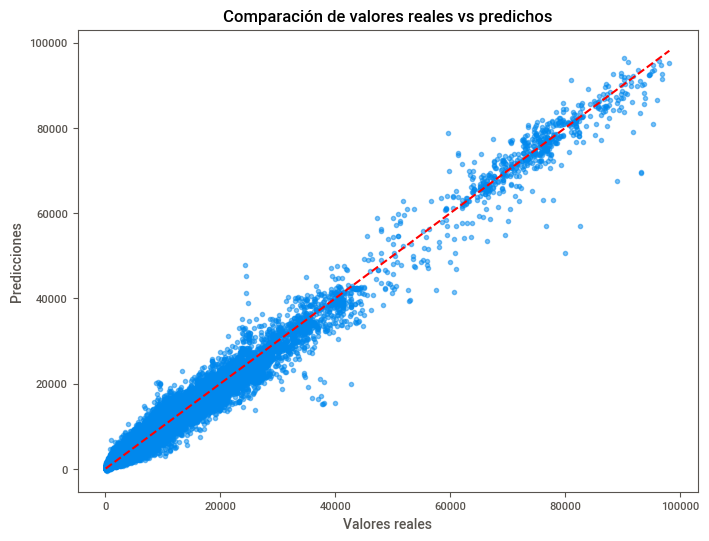

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle="--")  # Línea ideal
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Comparación de valores reales vs predichos")
plt.show()

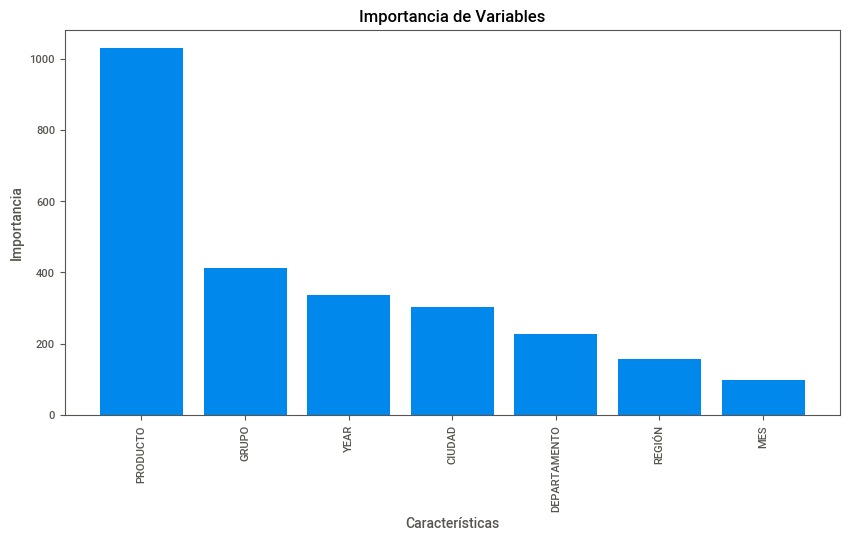

In [ ]:
import numpy as np

# Obtener importancia de variables si está disponible
if hasattr(automl.model, "feature_importances_"):
    importances = automl.model.feature_importances_
    feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else [f"Feature {i}" for i in range(X_train.shape[1])]

    sorted_indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 5))
    plt.bar(range(len(importances)), importances[sorted_indices], align="center")
    plt.xticks(range(len(importances)), np.array(feature_names)[sorted_indices], rotation=90)
    plt.xlabel("Características")
    plt.ylabel("Importancia")
    plt.title("Importancia de Variables")
    plt.show()